In [1]:
!conda activate tensorflow


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [5]:
import pandas as pd
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup as bs

In [6]:
all_player_years_pergame = pd.DataFrame()  # Renamed variable

for i in tqdm(range(2000, 2024)):
    url = f'https://www.basketball-reference.com/leagues/NBA_{i}_per_game.html'
    page = requests.get(url)

    soup = bs(page.content, "html.parser")

    table = soup.find(id='per_game_stats')

    # Only grabbing "full season" rows & ignoring partials & headers
    rows = table.find_all('tr', {'class': 'full_table'})

    all_players = pd.DataFrame()
    for r in rows:
        stat = r.find_all('td')
        plyr = {}
        for s in stat:
            key = s.get('data-stat')
            plyr[key] = s.text

        df = pd.DataFrame(plyr, index=[0])
        all_players = pd.concat([all_players, df])

    all_players['season'] = i
    all_player_years_pergame = pd.concat([all_player_years_pergame, all_players])

all_player_years_pergame.reset_index(drop=True, inplace=True)

summary = all_player_years_pergame.groupby(['season'], as_index=False).agg({'player': 'count'})
print(summary)



100%|██████████| 24/24 [00:26<00:00,  1.12s/it]

    season  player
0     2000     439
1     2001     441
2     2002     440
3     2003     428
4     2004     442
5     2005     464
6     2006     458
7     2007     458
8     2008     451
9     2009     445
10    2010     442
11    2011     452
12    2012     478
13    2013     469
14    2014     482
15    2015     492
16    2016     476
17    2017     486
18    2018     540
19    2019     530
20    2020     529
21    2021     540
22    2022     605
23    2023     539


In [16]:
all_player_years_pergame.to_csv('pergame.csv', index=False)

In [7]:
import pandas as pd
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup as bs

all_player_years_advanced = pd.DataFrame()  # Renamed variable

for i in tqdm(range(2000, 2024)):
    url = f'https://www.basketball-reference.com/leagues/NBA_{i}_advanced.html'
    page = requests.get(url)

    soup = bs(page.content, "html.parser")

    table = soup.find(id='advanced_stats')

    # Only grabbing "full season" rows & ignoring partials & headers
    rows = table.find_all('tr', {'class': 'full_table'})

    all_players = pd.DataFrame()
    for r in rows:
        stat = r.find_all('td')
        plyr = {}
        for s in stat:
            key = s.get('data-stat')
            plyr[key] = s.text

        df = pd.DataFrame(plyr, index=[0])
        all_players = pd.concat([all_players, df])

    all_players['season'] = i
    all_player_years_advanced = pd.concat([all_player_years_advanced, all_players])

all_player_years_advanced.reset_index(drop=True, inplace=True)

summary = all_player_years_advanced.groupby(['season'], as_index=False).agg({'player': 'count'})
print(summary)


100%|██████████| 24/24 [00:24<00:00,  1.01s/it]

    season  player
0     2000     439
1     2001     441
2     2002     440
3     2003     428
4     2004     442
5     2005     464
6     2006     458
7     2007     458
8     2008     451
9     2009     445
10    2010     442
11    2011     452
12    2012     478
13    2013     469
14    2014     482
15    2015     492
16    2016     476
17    2017     486
18    2018     540
19    2019     530
20    2020     529
21    2021     540
22    2022     605
23    2023     539


In [17]:
all_player_years_pergame.to_csv('advanced.csv', index=False)

In [8]:
all_player_years_advanced.head()

,player,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,DUMMY,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,season
0,Tariq Abdul-Wahad,SG,25,TOT,61,1578,13.6,.477,.036,.299,...,,0.4,1.8,2.2,.068,-1.2,-0.1,-1.2,0.3,2000
1,Shareef Abdur-Rahim,SF,23,VAN,82,3223,20.2,.547,.075,.431,...,,6.2,2.6,8.8,.132,2.6,-0.4,2.2,3.4,2000
2,Cory Alexander,PG,26,DEN,29,329,8.8,.381,.357,.224,...,,-0.5,0.4,-0.1,-0.012,-4.1,1.8,-2.4,0.0,2000
3,Ray Allen*,SG,24,MIL,82,3070,20.6,.570,.288,.282,...,,9.0,1.0,10.1,.157,4.7,-1.1,3.6,4.3,2000
4,Rafer Alston,PG,23,MIL,27,361,4.3,.310,.147,.042,...,,-0.7,0.0,-0.7,-0.095,-5.0,-2.3,-7.3,-0.5,2000


In [20]:
all_player_years_shooting = pd.DataFrame()  # Renamed variable

for i in tqdm(range(2000, 2024)):
    url = f'https://www.basketball-reference.com/leagues/NBA_{i}_shooting.html'
    page = requests.get(url)

    soup = bs(page.content, "html.parser")

    table = soup.find(id='shooting_stats')

    # Only grabbing "full season" rows & ignoring partials & headers
    rows = table.find_all('tr', {'class': 'full_table'})

    all_players = pd.DataFrame()
    for r in rows:
        stat = r.find_all('td')
        plyr = {}
        for s in stat:
            key = s.get('data-stat')
            plyr[key] = s.text

        df = pd.DataFrame(plyr, index=[0])
        all_players = pd.concat([all_players, df])

    all_players['season'] = i
    all_player_years_shooting = pd.concat([all_player_years_shooting, all_players])

all_player_years_shooting.reset_index(drop=True, inplace=True)

summary = all_player_years_shooting.groupby(['season'], as_index=False).agg({'player': 'count'})
print(summary)

100%|██████████| 24/24 [00:27<00:00,  1.13s/it]

    season  player
0     2000     439
1     2001     441
2     2002     440
3     2003     428
4     2004     442
5     2005     464
6     2006     458
7     2007     458
8     2008     451
9     2009     445
10    2010     442
11    2011     452
12    2012     478
13    2013     469
14    2014     482
15    2015     492
16    2016     476
17    2017     486
18    2018     540
19    2019     530
20    2020     529
21    2021     540
22    2022     605
23    2023     539


In [21]:
all_player_years_shooting.to_csv('shooting.csv', index=False)

In [22]:
print(all_player_years_advanced.shape)
print(all_player_years_pergame.shape)
print(all_player_years_shooting.shape)

(11526, 28)
(11526, 30)
(11526, 30)


In [113]:
duplicates_advanced = all_player_years_advanced.duplicated(subset=['player', 'season'], keep=False)
print(all_player_years_advanced[duplicates_advanced])

duplicates_pergame = all_player_years_pergame.duplicated(subset=['player', 'season'], keep=False)
print(all_player_years_pergame[duplicates_pergame])

NameError: name 'all_player_years_advanced' is not defined

In [27]:
# Drop duplicates from all_player_years_advanced
all_player_years_advanced = all_player_years_advanced.drop_duplicates(subset=['player', 'season'])

# Drop duplicates from all_player_years_pergame
all_player_years_pergame = all_player_years_pergame.drop_duplicates(subset=['player', 'season'])

all_player_years_shooting = all_player_years_shooting.drop_duplicates(subset=['player', 'season'])

In [31]:
import pandas as pd

# Merge all_player_years_advanced and all_player_years_pergame on 'player' and 'season'
merged_df = pd.merge(all_player_years_advanced, all_player_years_pergame, on=['player', 'season'], how='inner')

# Merge the result with all_player_years_shooting on 'player' and 'season'
merged_df = pd.merge(merged_df, all_player_years_shooting, on=['player', 'season'], how='inner')

# Print the shape of each DataFrame before merging
print("all_player_years_advanced shape:", all_player_years_advanced.shape)
print("all_player_years_pergame shape:", all_player_years_pergame.shape)
print("all_player_years_shooting shape:", all_player_years_shooting.shape)

# Print the shape of the merged DataFrame
print("Merged DataFrame shape:", merged_df.shape)


all_player_years_advanced shape: (11522, 28)
all_player_years_pergame shape: (11522, 30)
all_player_years_shooting shape: (11522, 30)
Merged DataFrame shape: (11522, 84)


In [26]:
column_names = list(merged_df_filtered.columns.values)
print(column_names)

NameError: name 'merged_df_filtered' is not defined

In [4]:
merged_df.to_csv('merged_df.csv', index=False)

NameError: name 'merged_df' is not defined

In [4]:
import pandas as pd

In [27]:
merged_df = pd.read_csv('merged_df.csv')

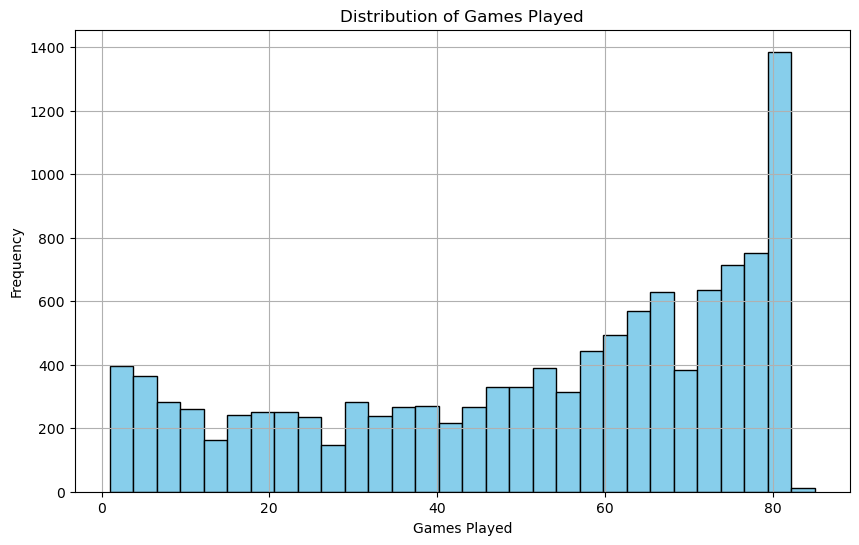

In [7]:
import matplotlib.pyplot as plt
import numpy as np

merged_df['g'] = pd.to_numeric(merged_df['g'], errors='coerce')

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['g'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Games Played')
plt.xlabel('Games Played')
plt.ylabel('Frequency')



plt.grid(True)
plt.show()



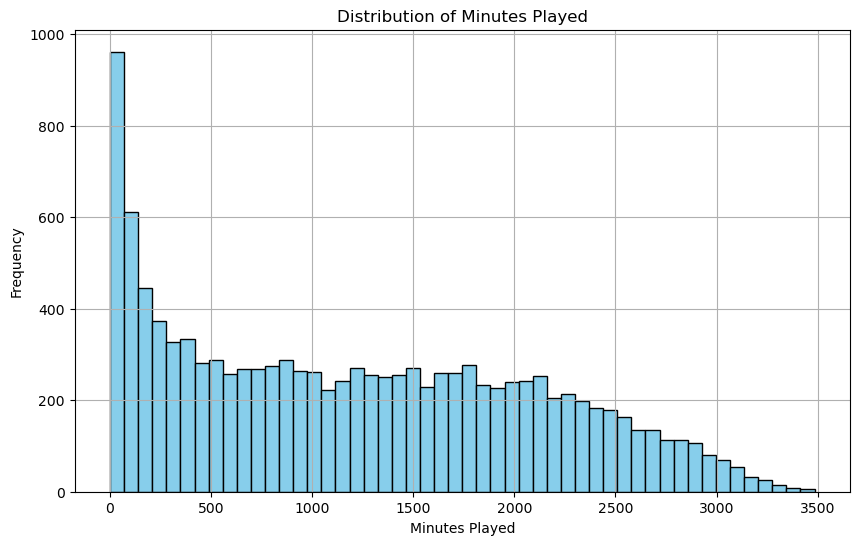

In [8]:
merged_df['mp_y'] = pd.to_numeric(merged_df['mp_y'], errors='coerce')
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['mp_y'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')



plt.grid(True)
plt.show()

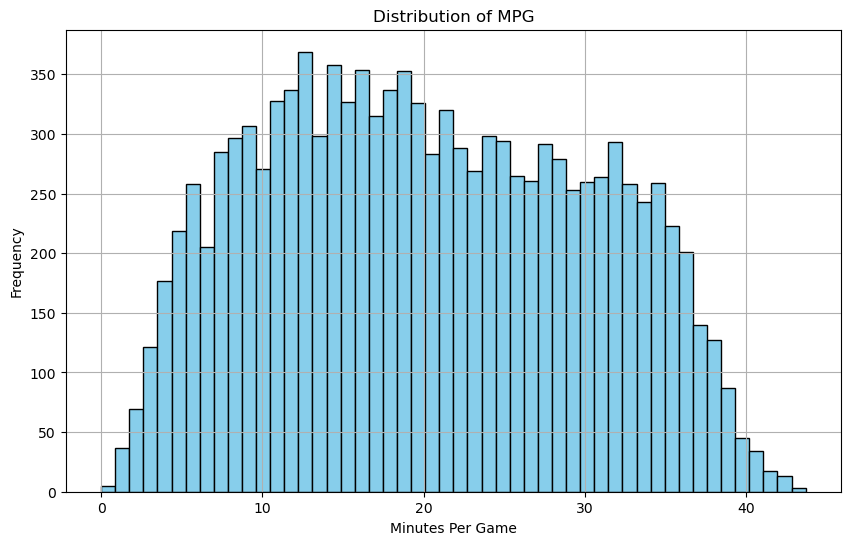

In [9]:
merged_df['mp_per_g'] = pd.to_numeric(merged_df['mp_per_g'], errors='coerce')
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df['mp_per_g'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('Minutes Per Game')
plt.ylabel('Frequency')



plt.grid(True)
plt.show()

In [10]:
# Check the data type of the 'g' column
print("Data type of 'g' column:", merged_df['g'].dtype)

# Inspect unique values in the 'g' column
print("Unique values in 'g' column:", merged_df['g'].unique())


Data type of 'g' column: int64
Unique values in 'g' column: [61 82 29 27 80 64 72 73 59 49 46 79 20 16 62 24  3 48  1 13 38 11 17 69
 52 26 77  8 81 71 63  6 37 66 75 58 34 56 74 78 21 57 65 25 53 67 54 55
 22 28 68 32  5 23 47 39 19 42 30 31 60 76 41 85 50 35  4 12 15 45  2 70
  7 43 33 40 36 10 51 44 14 18  9 83 84]


In [11]:
# Calculate the 25th percentile for the specified columns
#percentile_g = merged_df['g'].quantile(0.25)
#percentile_mp_per_g = merged_df['mp_per_g'].quantile(0.25)
#percentile_mp_y = merged_df['mp_y'].quantile(0.25)

# Display the 25th percentile for each column
#print("25th Percentile for 'g':", percentile_g)
#print("25th Percentile for 'mp_per_g':", percentile_mp_per_g)
#print("25th Percentile for 'mp_y':", percentile_mp_y)


25th Percentile for 'g': 32.0
25th Percentile for 'mp_per_g': 12.125
25th Percentile for 'mp_y': 381.5


In [28]:
# Define the columns to remove
columns_to_remove = ['pos_x', 'age_x', 'team_id_x', 'g_x', 'mp_x', 'DUMMY_x', 
                     'pos_y', 'age_y', 'team_id_y', 'g_y', 'fg_pct_y', 'DUMMY_y']

# Create a new DataFrame with the specified columns removed
merged_df = merged_df.drop(columns=columns_to_remove)

In [29]:
# Filter rows where at least one of the columns is above the 25th percentile
#merged_df_filtered = merged_df[(merged_df['g'] >= percentile_g) | 
#                                (merged_df['mp_per_g'] >= percentile_mp_per_g) | 
#                                (merged_df['mp_y'] >= percentile_mp_y)]

# Display the filtered DataFrame
#print(merged_df_filtered.shape)
merged_df_filtered = merged_df


In [30]:
# Fill empty strings with NaN
merged_df_filtered.replace('', float('nan'), inplace=True)

# Drop rows with NA values
#merged_df_filtered_cleaned = merged_df_filtered.dropna()
merged_df_filtered_cleaned = merged_df_filtered

# Define columns to convert to floats
columns_to_convert = [col for col in merged_df_filtered_cleaned.columns if col not in ['player', 'pos', 'team_id', 'season']]

# Convert columns to floats
merged_df_filtered_cleaned[columns_to_convert] = merged_df_filtered_cleaned[columns_to_convert].astype(float)

# Display the cleaned DataFrame
print(merged_df_filtered_cleaned)


                    player   per  ts_pct  fg3a_per_fga_pct  fta_per_fga_pct   
0        Tariq Abdul-Wahad  13.6   0.477             0.036            0.299  \
1      Shareef Abdur-Rahim  20.2   0.547             0.075            0.431   
2           Cory Alexander   8.8   0.381             0.357            0.224   
3               Ray Allen*  20.6   0.570             0.288            0.282   
4             Rafer Alston   4.3   0.310             0.147            0.042   
...                    ...   ...     ...               ...              ...   
11517       Thaddeus Young  14.1   0.573             0.172            0.131   
11518           Trae Young  22.0   0.573             0.331            0.460   
11519       Omer Yurtseven  16.7   0.675             0.259            0.222   
11520          Cody Zeller  16.4   0.659             0.034            0.593   
11521          Ivica Zubac  16.7   0.661             0.004            0.463   

       orb_pct  drb_pct  trb_pct  ast_pct  stl_pct 

In [12]:
merged_df_filtered_cleaned.to_csv('merged_df_filtered_cleaned.csv', index = False)

NameError: name 'merged_df_filtered_cleaned' is not defined

In [13]:
merged_df_filtered_cleaned = pd.read_csv('merged_df_filtered_cleaned.csv')

In [31]:
# List of selected features
subset_features = [
    'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 
    'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 
    'ws_per_48', 'bpm', 'vorp', 'season', 'gs', 'mp_per_g', 'fga_per_g', 
    'fg_pct_x', 'fg3a_per_g', 'fg3_pct', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 
    'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'pf_per_g', 
    'pts_per_g', 'age', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 
    'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 
    'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 
    'fg_pct_fg3a', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3', 'player'
]

# Subset the DataFrame to include only selected features
merged_select = merged_df_filtered_cleaned[subset_features]

merged_select['season'] = merged_select['season'].astype(str)

merged_select.to_csv('merged_select.csv', index=False)

/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/130617678.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_select['season'] = merged_select['season'].astype(str)


In [32]:
print(merged_df_filtered_cleaned.dtypes)

player               object
per                 float64
ts_pct              float64
fg3a_per_fga_pct    float64
fta_per_fga_pct     float64
                     ...   
fg_dunk             float64
pct_fg3a_corner3    float64
fg_pct_corner3      float64
fg3a_heave          float64
fg3_heave           float64
Length: 72, dtype: object


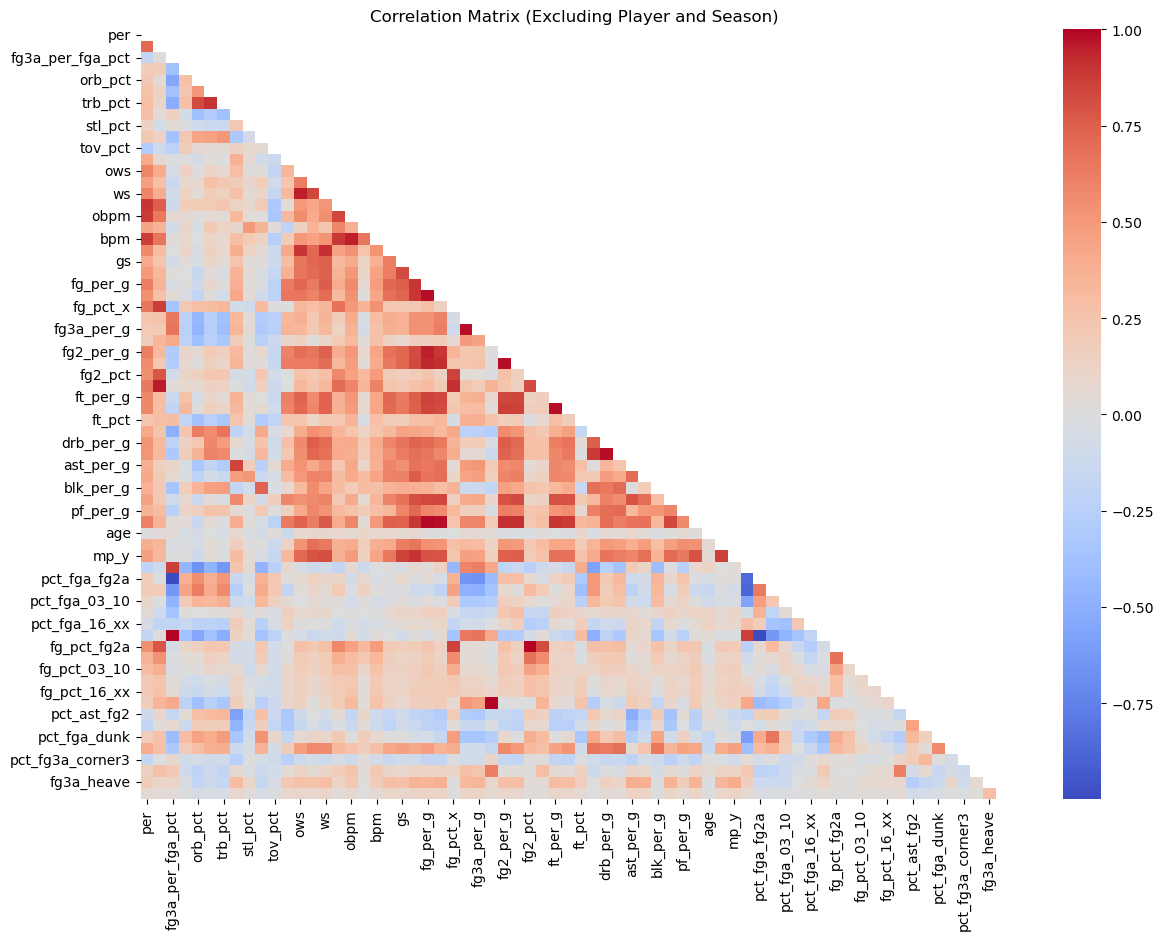

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_df_filtered is your DataFrame

# Drop 'player' and 'season' columns
merged_df_filtered_no_player_season = merged_df_filtered_cleaned.drop(columns=['player', 'pos', 'team_id', 'season'])

# Create correlation matrix
correlation_matrix = merged_df_filtered_no_player_season.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(14, 10))

# Create a heatmap plot showing only the bottom half of the correlation matrix without annotations
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask)

# Add title
plt.title('Correlation Matrix (Excluding Player and Season)')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()


In [34]:
# Assuming correlation_matrix is your correlation matrix DataFrame

# Get absolute correlation values and flatten the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the pairs of variables with the highest correlation
highest_correlation_pairs = upper_triangle.unstack().sort_values(ascending=False).drop_duplicates()

# Display the variables with the highest correlation
print("Variables with the highest correlation:")
print(highest_correlation_pairs.head())


Variables with the highest correlation:
fg_pct_fg3a   fg3_pct             1.000000
pct_fga_fg2a  fg3a_per_fga_pct    1.000000
pct_fga_fg3a  pct_fga_fg2a        1.000000
pts_per_g     fg_per_g            0.989920
fg3a_per_g    fg3_per_g           0.983314
dtype: float64


In [18]:
from sklearn.cluster import KMeans

In [19]:
column_names_cleaned = list(merged_df_filtered_cleaned.columns.values)
print(column_names_cleaned)

['player', 'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'season', 'gs', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct_x', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'pos', 'age', 'team_id', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_fg3a', 'pct_ast_fg2', 'pct_ast_fg3', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3', 'fg3a_heave', 'fg3_heave']


In [20]:
print(column_names_cleaned)

['player', 'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'season', 'gs', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct_x', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'pos', 'age', 'team_id', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_fg3a', 'pct_ast_fg2', 'pct_ast_fg3', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3', 'fg3a_heave', 'fg3_heave']


In [21]:
non_numeric_columns = merged_df_filtered_cleaned.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
print(non_numeric_columns)

['player', 'pos', 'team_id']


In [22]:
# Get column names from the DataFrame
column_names_cleaned = list(merged_df_filtered_cleaned.columns.values)

# Features for clustering (excluding non-numeric columns)
features = [col for col in column_names_cleaned if col not in non_numeric_columns]

print(features)

['per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'season', 'gs', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct_x', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'age', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_fg3a', 'pct_ast_fg2', 'pct_ast_fg3', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3', 'fg3a_heave', 'fg3_heave']


In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# List of features
numerical_features = merged_df_filtered_cleaned.select_dtypes(include=['float64', 'int64']).columns
non_numerical_features = merged_df_filtered_cleaned.select_dtypes(exclude=['float64', 'int64']).columns

# Define the preprocessing steps for numerical data
numeric_transformer = StandardScaler()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)
    ])

# Apply the preprocessing to the entire dataset
X_scaled = preprocessor.fit_transform(merged_df_filtered_cleaned[numerical_features])


In [24]:
# Drop rows with NA values
merged_df_filtered_cleaned_no_NA = merged_df_filtered_cleaned.dropna()

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Define numerical features
numerical_features = merged_df_filtered.select_dtypes(include=['float64', 'int64']).columns
non_numerical_features = merged_df_filtered.select_dtypes(exclude=['float64', 'int64']).columns

# Calculate the 10th percentile for numerical columns
percentiles = merged_df_filtered[numerical_features].quantile(0.10)

# Function to fill missing values with the 10th percentile for numerical columns
def fill_with_percentile(df, percentiles, numerical_features):
    for col in numerical_features:
        df[col].fillna(percentiles[col], inplace=True)
    return df

# Impute missing values
merged_df_imputed = fill_with_percentile(merged_df_filtered.copy(), percentiles, numerical_features)

# Define the preprocessing steps for numerical data
numeric_transformer = StandardScaler()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)
    ])

# Apply the preprocessing to the imputed DataFrame
X_scaled_for_prediction = preprocessor.fit_transform(merged_df_imputed[numerical_features])

# Ensure the scaled DataFrame has the same number of columns as the training DataFrame
assert X_scaled.shape[1] == X_scaled_for_prediction.shape[1]

# Predict clusters
merged_df_filtered['cluster'] = kmeans.predict(X_scaled_for_prediction)

# Check cluster distribution
print(merged_df_filtered['cluster'].value_counts())


NameError: name 'kmeans' is not defined

In [93]:
for cluster_num in range(10):
    print(f"Cluster {cluster_num}:")
    cluster_data = merged_df_filtered[merged_df_filtered['cluster'] == cluster_num]
    random_players = cluster_data.sample(10)['player']  # Assuming 'player_name' is the column with player names
    print(random_players)
    print('-' * 50)

Cluster 0:
8167      Jarnell Stokes
7030       James Johnson
6832     Bismack Biyombo
9472        Enes Freedom
8021          Shawn Long
9049        Damian Jones
7384            Ed Davis
8126         Willie Reed
10823      Mason Plumlee
8449         John Henson
Name: player, dtype: object
--------------------------------------------------
Cluster 1:
1992         Mark Madsen
343       Eddie Robinson
5525          Taj Gibson
5679      Timofey Mozgov
42            Ryan Bowen
4454    Shelden Williams
3435    Kendrick Perkins
3154      Andray Blatche
4040    Hilton Armstrong
3895         Johan Petro
Name: player, dtype: object
--------------------------------------------------
Cluster 2:
6005         James Harden
9390         Jimmy Butler
2794       Kevin Garnett*
10539         Joel Embiid
1528          Jason Kidd*
4588         Kevin Durant
11320    Donovan Mitchell
8317         Jimmy Butler
2404         LeBron James
1597       Dirk Nowitzki*
Name: player, dtype: object
---------------------

In [94]:
# Group the data by 'cluster' and calculate the mean for each numerical feature
cluster_means = merged_df_filtered.groupby('cluster')[numerical_features].mean()

print(cluster_means)


               per    ts_pct  fg3a_per_fga_pct  fta_per_fga_pct    orb_pct   
cluster                                                                      
0        18.794168  0.646361          0.028490         0.488633  12.096760  \
1        12.765763  0.517986          0.012670         0.413502  10.880403   
2        25.502941  0.588513          0.253113         0.402592   4.252101   
3         7.178228  0.417986          0.063240         0.360288   6.792192   
4        16.761153  0.545495          0.078982         0.326841   8.726467   
5        13.866190  0.506884          0.189345         0.281165   2.844007   
6        21.611146  0.580694          0.029908         0.448748  10.560510   
7        18.543409  0.551063          0.278434         0.311260   2.836884   
8        10.464920  0.486670          0.178874         0.256280   5.167540   
9         0.134019  0.277815          0.357467         0.208093   4.465981   
10       13.047032  0.559748          0.476410         0.205813 

In [95]:
# Save cluster means DataFrame to a CSV file
cluster_means.to_csv('cluster_means.csv')


In [28]:
# Rank the cluster means DataFrame
cluster_ranks = cluster_means.rank(axis=0, ascending=False)

print(cluster_ranks)

          per  ts_pct  fg3a_per_fga_pct  fta_per_fga_pct  orb_pct  drb_pct   
cluster                                                                      
0         4.0     1.0              13.0              3.0      1.0      2.0  \
1         9.0    12.0              14.0              5.0      3.0      5.0   
2         1.0     2.0               8.0              1.0      7.0      4.0   
3        14.0    14.0              11.0              8.0      8.0     13.0   
4         5.0     8.0              12.0              6.0      4.0      3.0   
5         7.0    10.0              10.0              7.0     12.0     14.0   
6         2.0     3.0              15.0              2.0      2.0      1.0   
7         3.0     5.0               7.0              4.0     11.0     11.0   
8        12.0    13.0               9.0             10.0      6.0      8.0   
9        15.0    15.0               3.0             14.0      9.0      9.0   
10        8.0     4.0               2.0             13.0     10.

In [38]:
# Create a heatmap to illustrate the cluster rankings
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_ranks, annot=False, cmap='coolwarm', cbar=True, linewidths=.5, xticklabels=True)
plt.title('Cluster Rankings for Each Stat Category')
plt.xlabel('Stat Category')
plt.ylabel('Cluster')
plt.show()

NameError: name 'cluster_ranks' is not defined

<Figure size 1200x800 with 0 Axes>

In [39]:
# List of selected features
selected_features = [
    'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 
    'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 
    'ws_per_48', 'bpm', 'vorp', 'season', 'gs', 'mp_per_g', 'fga_per_g', 
    'fg_pct_x', 'fg3a_per_g', 'fg3_pct', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 
    'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'pf_per_g', 
    'pts_per_g', 'age', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 
    'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 
    'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 
    'fg_pct_fg3a', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3', 'player'
]

# Subset the DataFrame to include only selected features
merged_subset = merged_df_filtered[selected_features]

merged_subset['season'] = merged_subset['season'].astype(str)

merged_subset.to_csv('merged_subset.csv')

/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/85531732.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_subset['season'] = merged_subset['season'].astype(str)


In [40]:
merged_subset['season'] = merged_subset['season'].astype(str)

/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/2447280081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_subset['season'] = merged_subset['season'].astype(str)


In [41]:
# Define numerical features
numerical_features_subset = merged_subset.select_dtypes(include=['float64', 'int64']).columns
non_numerical_features_subset = merged_subset.select_dtypes(exclude=['float64', 'int64']).columns

# Calculate the 10th percentile for numerical columns
percentiles_subset = merged_subset[numerical_features_subset].quantile(0.10)

# Function to fill missing values with the 10th percentile for numerical columns
def fill_with_percentile_subset(df, percentiles, numerical_features):
    for col in numerical_features:
        df[col].fillna(percentiles[col], inplace=True)
    return df

# Impute missing values
merged_subset_imputed = fill_with_percentile_subset(merged_subset.copy(), percentiles_subset, numerical_features_subset)

# Define the preprocessing steps for numerical data
numeric_transformer = StandardScaler()

# Create the column transformer
preprocessor_subset = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_subset)
    ])

# Apply the preprocessing to the imputed DataFrame
X_scaled_subset = preprocessor_subset.fit_transform(merged_subset_imputed[numerical_features_subset])

# Initialize K-means clustering
kmeans = KMeans(n_clusters=15, random_state=0, n_init="auto").fit(X_scaled_subset)

# Add cluster labels to DataFrame
merged_subset_imputed['cluster'] = kmeans.predict(X_scaled_subset)

# Check cluster distribution
print(merged_subset_imputed['cluster'].value_counts())

cluster
9     1352
2     1339
12    1029
7     1024
4      937
11     932
1      918
8      774
6      730
0      690
5      627
3      371
14     299
10     295
13     205
Name: count, dtype: int64


In [42]:
merged_subset_imputed.to_csv('merged_subset_clusters_imputed.csv', index=False)

In [43]:
columns_list = merged_subset_imputed.columns.tolist()
print(columns_list)

['per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ws_per_48', 'bpm', 'vorp', 'season', 'gs', 'mp_per_g', 'fga_per_g', 'fg_pct_x', 'fg3a_per_g', 'fg3_pct', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'pf_per_g', 'pts_per_g', 'age', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_fg3a', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3', 'player', 'cluster']


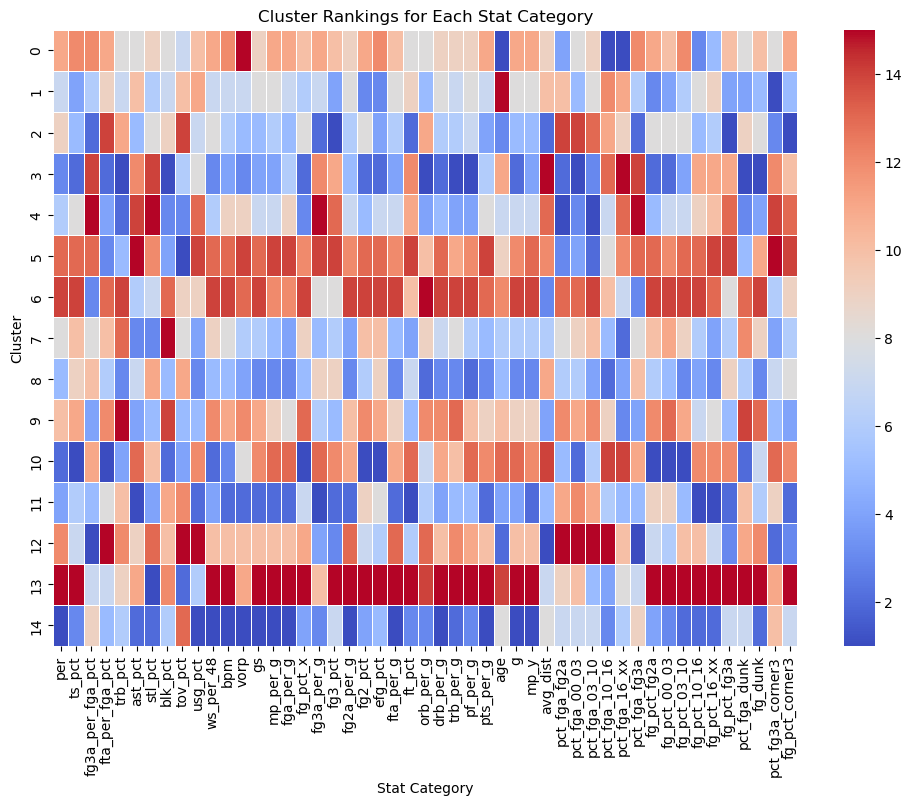

In [44]:
# Group the data by 'cluster' and calculate the mean for each numerical feature
cluster_means_subset = merged_subset_imputed.groupby('cluster')[numerical_features_subset].mean()

# Rank the cluster means DataFrame
cluster_ranks_subset = cluster_means_subset.rank(axis=0, ascending=False)

# Create a heatmap to illustrate the cluster rankings
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_ranks_subset, annot=False, cmap='coolwarm', cbar=True, linewidths=.5, xticklabels=True)
plt.title('Cluster Rankings for Each Stat Category')
plt.xlabel('Stat Category')
plt.ylabel('Cluster')
plt.show()

In [45]:
for cluster_num in range(10):
    print(f"Cluster {cluster_num}:")
    cluster_data_subset = merged_subset_imputed[merged_subset_imputed['cluster'] == cluster_num]
    random_players_subset = cluster_data_subset.sample(10)['player']  # Assuming 'player_name' is the column with player names
    print(random_players_subset)
    print('-' * 50)

Cluster 0:
6283        D.J. White
840        Otis Thorpe
6246      Lance Thomas
2351    Adrian Griffin
567        Greg Foster
40         Cal Bowdler
4826    Ramon Sessions
1249      Jabari Smith
899      Stacey Augmon
869     Monty Williams
Name: player, dtype: object
--------------------------------------------------
Cluster 1:
4030                Tony Allen
11230          Stanley Johnson
9068            Rodions Kurucs
10326    Juan Toscano-Anderson
9716        Michael Porter Jr.
3599               Matt Barnes
10414         Keita Bates-Diop
5388               Matt Barnes
8334           Marquese Chriss
10514           Hamidou Diallo
Name: player, dtype: object
--------------------------------------------------
Cluster 2:
3541     Martell Webster
5662         Jodie Meeks
8552     Lauri Markkanen
1009        Derek Fisher
11499     Grant Williams
10989      Grayson Allen
10474        Alex Caruso
7442         Danny Green
8460      Justin Holiday
11491      Derrick White
Name: player, dtype

In [50]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel

# Read the CSV file with a specified encoding
final_acl_dates = pd.read_csv('final_acl_dates.csv')

# Filter out rows where 'Return_Date' is "Game log table not found"
acl_injuries = final_acl_dates[final_acl_dates['Return_Date'] != "Game log table not found"]

# Convert date columns to datetime
acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
acl_injuries['Return_Date'] = pd.to_datetime(acl_injuries['Return_Date'])

# Define a function to calculate the season year
def get_season_year(date):
    if date.month >= 10:
        return date.year + 1
    else:
        return date.year

# Add Injury_Season and Return_Season columns
acl_injuries['Injury_Season'] = acl_injuries['Injury_Date'].apply(lambda x: get_season_year(x))
acl_injuries['Return_Season'] = acl_injuries['Return_Date'].apply(lambda x: get_season_year(x))

# Display the DataFrame
print(acl_injuries)

            Player Injury_Date Return_Date Reason  Injury_Season   
0    Tom Gugliotta  2000-03-11  2000-11-17    NaN           2000  \
1      Bonzi Wells  2001-04-10  2001-10-30    NaN           2001   
2   Jamal Crawford  2001-07-18  2002-03-03    NaN           2001   
3   Chris Crawford  2001-11-10  2002-11-10    NaN           2002   
4    Al Harrington  2002-01-24  2002-10-30    NaN           2002   
..             ...         ...         ...    ...            ...   
71    Jamal Murray  2021-04-13  2021-10-20    NaN           2021   
72     Dario Šarić  2021-07-07  2021-10-20    NaN           2021   
73       PJ Dozier  2021-11-24  2023-01-09    NaN           2022   
74  Kira Lewis Jr.  2021-12-09  2022-12-13    NaN           2022   
75      Joe Ingles  2022-01-31  2022-10-20    NaN           2022   

    Return_Season  
0            2001  
1            2002  
2            2002  
3            2003  
4            2003  
..            ...  
71           2022  
72           2022  
73 

/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/3154627370.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/3154627370.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/3154627370.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing

In [8]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel

# Convert date columns to datetime
acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
acl_injuries['Return_Date'] = pd.to_datetime(acl_injuries['Return_Date'])

# Extract unique player names
acl_players = acl_injuries['Player']

# Define function to calculate similarity
def calculate_similarity(index_season_stats, potential_controls):
    # Ensure both datasets have only numeric columns
    index_season_stats = index_season_stats.select_dtypes(include=[np.number])
    potential_controls = potential_controls.select_dtypes(include=[np.number])
    
    # Calculate Euclidean distance between the index season stats and potential controls
    distances = cdist(index_season_stats, potential_controls, metric='euclidean')
    return distances

# Prepare a list to store matched controls
matched_controls = []

# Loop through each ACL-injured player
for player in acl_players:
    # Get the player's injury data
    injury_data = acl_injuries[acl_injuries['Player'] == player].iloc[0]
    injury_season = injury_data['Injury_Season']
    return_season = injury_data['Return_Season']
    
    # Get the player's index season stats
    index_season_stats = merged_subset_imputed[(merged_subset_imputed['player'] == player) & 
                                                (merged_subset_imputed['season'] == injury_season)]
    
    if index_season_stats.empty:
        continue
    
    # Get player's age and seasons of play from the index season stats
    player_age = index_season_stats['age'].values[0]
    player_season = index_season_stats['season'].values[0]
    
    # Get potential control players (within 1 year of age and 5 seasons of play)
    potential_controls = merged_subset_imputed[(merged_subset_imputed['age'].between(player_age - 1, player_age + 1)) &
                                                (merged_subset_imputed['season'].between(player_season - 5, player_season + 5)) &
                                                (merged_subset_imputed['player'] != player)]
    
    # Calculate similarity scores
    similarity_scores = calculate_similarity(index_season_stats.iloc[:, 2:], 
                                             potential_controls.iloc[:, 2:])
    
    # Get the two most similar players
    closest_indices = similarity_scores.argsort()[0][:2]
    closest_controls = potential_controls.iloc[closest_indices]
    
    matched_controls.append(closest_controls)

# Concatenate all matched controls into a single DataFrame
matched_controls_df = pd.concat(matched_controls)

# Calculate the number of seasons missed due to ACL injury
acl_injuries['seasons_missed'] = acl_injuries['Return_Season'] - acl_injuries['Injury_Season']

# Define function to get pre-injury and post-injury stats for each year separately
def get_pre_post_stats(player_name, injury_season, max_seasons_post_injury):
    # Get player's data
    player_data = merged_subset_imputed[merged_subset_imputed['player'] == player_name]
    
    # Get pre-injury stats (including the injury season)
    pre_injury_stats = player_data[player_data['season'] <= injury_season].select_dtypes(include=[np.number]).mean()
    
    # Get post-injury stats for each year separately
    post_injury_stats = {}
    for i in range(1, max_seasons_post_injury + 1):
        season = injury_season + i
        stats = player_data[player_data['season'] == season].select_dtypes(include=[np.number]).mean()
        if not stats.empty:
            post_injury_stats[season] = stats
            
    return pre_injury_stats, post_injury_stats

# Determine the maximum number of seasons post-injury to consider
max_seasons_post_injury = 5

# Prepare lists to store results
pre_injury_list = []
post_injury_list = []
season_list = []

# Track players processed successfully
processed_players = []

# Loop through each ACL-injured player and their matched controls
for index, row in acl_injuries.iterrows():
    player_name = row['Player']
    injury_season = row['Injury_Season']
    return_season = row['Return_Season']
    
    # Get pre-injury and post-injury stats for the ACL-injured player
    pre_stats, post_stats = get_pre_post_stats(player_name, injury_season, max_seasons_post_injury)
    if pre_stats.isna().any():
        continue
    
    for season, post_season_stats in post_stats.items():
        if post_season_stats.isna().any():
            continue
        pre_injury_list.append(pre_stats)
        post_injury_list.append(post_season_stats)
        season_list.append(season - injury_season)
        processed_players.append(player_name)
    
    # Get the matched controls
    matched_control_names = matched_controls_df[matched_controls_df['player'] == player_name]['player'].unique()
    
    for control_name in matched_control_names:
        pre_stats, post_stats = get_pre_post_stats(control_name, injury_season, max_seasons_post_injury)
        if pre_stats.isna().any():
            continue
        
        for season, post_season_stats in post_stats.items():
            if post_season_stats.isna().any():
                continue
            pre_injury_list.append(pre_stats)
            post_injury_list.append(post_season_stats)
            season_list.append(season - injury_season)

# Convert lists to DataFrames
pre_injury_df = pd.DataFrame(pre_injury_list)
post_injury_df = pd.DataFrame(post_injury_list)
season_df = pd.Series(season_list, name='season_post_injury')

# Ensure that the data frames have the same length by removing rows with NaN values
pre_injury_df = pre_injury_df.dropna()
post_injury_df = post_injury_df.dropna()
season_df = season_df[season_df.index.isin(pre_injury_df.index)]

# Perform paired t-test for each statistical category for each year post-injury
results = {}

for column in pre_injury_df.columns:
    if column not in ['player', 'season']:  # exclude non-stat columns
        for season in range(1, max_seasons_post_injury + 1):
            pre_injury_data = pre_injury_df[season_df == season][column].dropna()
            post_injury_data = post_injury_df[season_df == season][column].dropna()
            
            # Ensure the arrays have equal length
            min_length = min(len(pre_injury_data), len(post_injury_data))
            pre_injury_data = pre_injury_data[:min_length]
            post_injury_data = post_injury_data[:min_length]
            
            # Perform t-test
            if len(pre_injury_data) > 0 and len(post_injury_data) > 0:  # Ensure there's data to compare
                t_stat, p_val = ttest_rel(pre_injury_data, post_injury_data)
                
                results[(column, season)] = {'t_stat': t_stat, 'p_val': p_val}

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T
results_df.columns = ['T-Statistic', 'P-Value']

# Display the results
print(results_df)

# Save results to a CSV file
results_df.to_csv('acl_injury_impact_analysis_by_year.csv')

# Identify players not included in the analysis
excluded_players = set(acl_players) - set(processed_players)
print("Excluded Players:", excluded_players)


/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/1205476714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/1205476714.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_injuries['Return_Date'] = pd.to_datetime(acl_injuries['Return_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/1205476714.py:63: SettingWithCopyWarning: 


           T-Statistic   P-Value
per     1     1.946044  0.056185
        2     0.247307  0.805462
        3    -1.085960  0.282920
        4    -1.419727  0.163434
        5    -0.216898  0.829665
...                ...       ...
cluster 1    -1.961741  0.054286
        2    -1.878961  0.064805
        3     0.373490  0.710428
        4    -0.181444  0.856936
        5    -0.990682  0.329273

[250 rows x 2 columns]
Excluded Players: set()


In [3]:
###WITH MATCHED CONTROLS SEPARATED
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel

# Load the player statistics data
merged_subset_imputed = pd.read_csv('merged_subset_clusters_imputed.csv')

# Convert date columns to datetime
acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
acl_injuries['Return_Date'] = pd.to_datetime(acl_injuries['Return_Date'])

# Extract unique player names
acl_players = acl_injuries['Player']

# Define function to calculate similarity
def calculate_similarity(index_season_stats, potential_controls):
    # Ensure both datasets have only numeric columns
    index_season_stats = index_season_stats.select_dtypes(include=[np.number])
    potential_controls = potential_controls.select_dtypes(include=[np.number])
    
    # Calculate Euclidean distance between the index season stats and potential controls
    distances = cdist(index_season_stats, potential_controls, metric='euclidean')
    return distances

# Prepare a list to store matched controls
matched_controls = []

# Loop through each ACL-injured player
for player in acl_players:
    # Get the player's injury data
    injury_data = acl_injuries[acl_injuries['Player'] == player].iloc[0]
    injury_season = injury_data['Injury_Season']
    return_season = injury_data['Return_Season']
    
    # Get the player's index season stats
    index_season_stats = merged_subset_imputed[(merged_subset_imputed['player'] == player) & 
                                                (merged_subset_imputed['season'] == injury_season)]
    
    if index_season_stats.empty:
        continue
    
    # Get player's age and seasons of play from the index season stats
    player_age = index_season_stats['age'].values[0]
    player_season = index_season_stats['season'].values[0]
    
    # Get potential control players (within 1 year of age and 5 seasons of play)
    potential_controls = merged_subset_imputed[(merged_subset_imputed['age'].between(player_age - 1, player_age + 1)) &
                                                (merged_subset_imputed['season'].between(player_season - 5, player_season + 5)) &
                                                (merged_subset_imputed['player'] != player)]
    
    # Calculate similarity scores
    similarity_scores = calculate_similarity(index_season_stats.iloc[:, 2:], 
                                             potential_controls.iloc[:, 2:])
    
    # Get the two most similar players
    closest_indices = similarity_scores.argsort()[0][:2]
    closest_controls = potential_controls.iloc[closest_indices]
    
    matched_controls.append(closest_controls)

# Concatenate all matched controls into a single DataFrame
matched_controls_df = pd.concat(matched_controls)

# Calculate the number of seasons missed due to ACL injury
acl_injuries['seasons_missed'] = acl_injuries['Return_Season'] - acl_injuries['Injury_Season']

# Define function to get pre-injury and post-injury stats
def get_pre_post_stats(player_name, injury_season, return_season):
    # Get player's data
    player_data = merged_subset_imputed[merged_subset_imputed['player'] == player_name]
    
    # Get pre-injury stats (including the injury season)
    pre_injury_stats = player_data[player_data['season'] <= injury_season].select_dtypes(include=[np.number]).mean()
    
    # Get post-injury stats (from the return season onwards)
    post_injury_stats = player_data[player_data['season'] >= return_season].select_dtypes(include=[np.number]).mean()
    
    return pre_injury_stats, post_injury_stats

# Prepare lists to store results separately for injured players and matched controls
pre_injury_injured_list = []
post_injury_injured_list = []
pre_injury_control_list = []
post_injury_control_list = []

# Track players processed successfully
processed_players = []

# Loop through each ACL-injured player and their matched controls
for index, row in acl_injuries.iterrows():
    player_name = row['Player']
    injury_season = row['Injury_Season']
    return_season = row['Return_Season']
    
    # Get pre-injury and post-injury stats for the ACL-injured player
    pre_stats, post_stats = get_pre_post_stats(player_name, injury_season, return_season)
    if pre_stats.isna().any() or post_stats.isna().any():
        continue
    pre_injury_injured_list.append(pre_stats)
    post_injury_injured_list.append(post_stats)
    processed_players.append(player_name)
    
    # Get the matched controls
    matched_control_names = matched_controls_df[matched_controls_df['player'] == player_name]['player'].unique()
    
    for control_name in matched_control_names:
        pre_stats, post_stats = get_pre_post_stats(control_name, injury_season, return_season)
        if pre_stats.isna().any() or post_stats.isna().any():
            continue
        pre_injury_control_list.append(pre_stats)
        post_injury_control_list.append(post_stats)

# Convert lists to DataFrames
pre_injury_injured_df = pd.DataFrame(pre_injury_injured_list)
post_injury_injured_df = pd.DataFrame(post_injury_injured_list)
pre_injury_control_df = pd.DataFrame(pre_injury_control_list)
post_injury_control_df = pd.DataFrame(post_injury_control_list)

# Ensure that the data frames have the same length by removing rows with NaN values
pre_injury_injured_df = pre_injury_injured_df.dropna()
post_injury_injured_df = post_injury_injured_df.dropna()
pre_injury_control_df = pre_injury_control_df.dropna()
post_injury_control_df = post_injury_control_df.dropna()

# Perform paired t-test for each statistical category separately for injured players and matched controls
results_injured = {}
results_control = {}

for column in pre_injury_injured_df.columns:
    if column not in ['player', 'season']:  # exclude non-stat columns
        # For injured players
        pre_injury_data_injured = pre_injury_injured_df[column].dropna()
        post_injury_data_injured = post_injury_injured_df[column].dropna()
        
        # Ensure the arrays have equal length
        min_length_injured = min(len(pre_injury_data_injured), len(post_injury_data_injured))
        pre_injury_data_injured = pre_injury_data_injured[:min_length_injured]
        post_injury_data_injured = post_injury_data_injured[:min_length_injured]
        
        # Perform t-test for injured players
        if len(pre_injury_data_injured) > 0 and len(post_injury_data_injured) > 0:  # Ensure there's data to compare
            t_stat_injured, p_val_injured = ttest_rel(pre_injury_data_injured, post_injury_data_injured)
            results_injured[column] = {'t_stat': t_stat_injured, 'p_val': p_val_injured}
        
        # For matched controls
        pre_injury_data_control = pre_injury_control_df[column].dropna()
        post_injury_data_control = post_injury_control_df[column].dropna()
        
        # Ensure the arrays have equal length
        min_length_control = min(len(pre_injury_data_control), len(post_injury_data_control))
        pre_injury_data_control = pre_injury_data_control[:min_length_control]
        post_injury_data_control = post_injury_data_control[:min_length_control]
        
        # Perform t-test for matched controls
        if len(pre_injury_data_control) > 0 and len(post_injury_data_control) > 0:  # Ensure there's data to compare
            t_stat_control, p_val_control = ttest_rel(pre_injury_data_control, post_injury_data_control)
            results_control[column] = {'t_stat': t_stat_control, 'p_val': p_val_control}

# Convert results to DataFrames for easy viewing
results_injured_df = pd.DataFrame(results_injured).T
results_control_df = pd.DataFrame(results_control).T
results_injured_df.columns = ['T-Statistic', 'P-Value']
results_control_df.columns = ['T-Statistic', 'P-Value']

# Display the results
print("Injured Players:")
print(results_injured_df)
print("\nMatched Controls:")
print(results_control_df)

# Save results to CSV files
results_injured_df.to_csv('acl_injury_impact_analysis_injured.csv')
results_control_df.to_csv('acl_injury_impact_analysis_controls.csv')

# Identify players not included in the analysis
excluded_players = set(acl_players) - set(processed_players)
print("Excluded Players:", excluded_players)


/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/2169319527.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/2169319527.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_injuries['Return_Date'] = pd.to_datetime(acl_injuries['Return_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/2169319527.py:67: SettingWithCopyWarning:

Injured Players:
                  T-Statistic       P-Value
per                  1.456466  1.499344e-01
ts_pct               0.817074  4.167821e-01
fg3a_per_fga_pct    -4.653823  1.586978e-05
fta_per_fga_pct      1.970079  5.296460e-02
trb_pct              0.121812  9.034128e-01
ast_pct             -0.509141  6.123262e-01
stl_pct              0.206052  8.373752e-01
blk_pct              0.744268  4.593168e-01
tov_pct              0.988828  3.263049e-01
usg_pct              1.974918  5.240013e-02
ws_per_48            0.994806  3.234098e-01
bpm                  0.599124  5.511107e-01
vorp                 1.405087  1.646152e-01
gs                   2.607785  1.122492e-02
mp_per_g             3.220590  1.974808e-03
fga_per_g            2.293078  2.498864e-02
fg_pct_x             1.247497  2.165583e-01
fg3a_per_g          -1.441630  1.540647e-01
fg3_pct             -1.406245  1.642726e-01
fg2a_per_g           3.558252  6.914752e-04
fg2_pct             -0.431471  6.675110e-01
efg_pct        

In [47]:
###WITH MATCHED CONTROLS SEPARATED BY YEAR
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel

# Load the player statistics data
merged_subset_imputed = pd.read_csv('merged_subset_clusters_imputed.csv')

# Convert date columns to datetime
acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
acl_injuries['Return_Date'] = pd.to_datetime(acl_injuries['Return_Date'])

# Extract unique player names
acl_players = acl_injuries['Player']

# Define function to calculate similarity
def calculate_similarity(index_season_stats, potential_controls):
    # Ensure both datasets have only numeric columns
    index_season_stats = index_season_stats.select_dtypes(include=[np.number])
    potential_controls = potential_controls.select_dtypes(include=[np.number])
    
    # Calculate Euclidean distance between the index season stats and potential controls
    distances = cdist(index_season_stats, potential_controls, metric='euclidean')
    return distances

# Prepare a list to store matched controls
matched_controls = []

# Loop through each ACL-injured player
for player in acl_players:
    # Get the player's injury data
    injury_data = acl_injuries[acl_injuries['Player'] == player].iloc[0]
    injury_season = injury_data['Injury_Season']
    return_season = injury_data['Return_Season']
    
    # Get the player's index season stats
    index_season_stats = merged_subset_imputed[(merged_subset_imputed['player'] == player) & 
                                                (merged_subset_imputed['season'] == injury_season)]
    
    if index_season_stats.empty:
        continue
    
    # Get player's age and seasons of play from the index season stats
    player_age = index_season_stats['age'].values[0]
    player_season = index_season_stats['season'].values[0]
    
    # Get potential control players (within 1 year of age and 5 seasons of play)
    potential_controls = merged_subset_imputed[(merged_subset_imputed['age'].between(player_age - 1, player_age + 1)) &
                                                (merged_subset_imputed['season'].between(player_season - 5, player_season + 5)) &
                                                (merged_subset_imputed['player'] != player)]
    
    # Calculate similarity scores
    similarity_scores = calculate_similarity(index_season_stats.iloc[:, 2:], 
                                             potential_controls.iloc[:, 2:])
    
    # Get the two most similar players
    closest_indices = similarity_scores.argsort()[0][:2]
    closest_controls = potential_controls.iloc[closest_indices]
    
    matched_controls.append(closest_controls)

# Concatenate all matched controls into a single DataFrame
matched_controls_df = pd.concat(matched_controls)

# Calculate the number of seasons missed due to ACL injury
acl_injuries['seasons_missed'] = acl_injuries['Return_Season'] - acl_injuries['Injury_Season']

# Define function to get pre-injury and post-injury stats for each year separately
def get_pre_post_stats(player_name, injury_season, max_seasons_post_injury):
    # Get player's data
    player_data = merged_subset_imputed[merged_subset_imputed['player'] == player_name]
    
    # Get pre-injury stats (including the injury season)
    pre_injury_stats = player_data[player_data['season'] <= injury_season].select_dtypes(include=[np.number]).mean()
    
    # Get post-injury stats for each year separately
    post_injury_stats = {}
    for i in range(1, max_seasons_post_injury + 1):
        season = injury_season + i
        stats = player_data[player_data['season'] == season].select_dtypes(include=[np.number]).mean()
        if not stats.empty:
            post_injury_stats[season] = stats
            
    return pre_injury_stats, post_injury_stats

# Determine the maximum number of seasons post-injury to consider
max_seasons_post_injury = 5

# Prepare lists to store results separately for injured players and matched controls
pre_injury_injured_list = []
post_injury_injured_list = []
season_injured_list = []

pre_injury_control_list = []
post_injury_control_list = []
season_control_list = []

# Track players processed successfully
processed_players = []

# Loop through each ACL-injured player and their matched controls
for index, row in acl_injuries.iterrows():
    player_name = row['Player']
    injury_season = row['Injury_Season']
    return_season = row['Return_Season']
    
    # Get pre-injury and post-injury stats for the ACL-injured player
    pre_stats, post_stats = get_pre_post_stats(player_name, injury_season, max_seasons_post_injury)
    if pre_stats.isna().any():
        continue
    
    for season, post_season_stats in post_stats.items():
        if post_season_stats.isna().any():
            continue
        pre_injury_injured_list.append(pre_stats)
        post_injury_injured_list.append(post_season_stats)
        season_injured_list.append(season - injury_season)
        processed_players.append(player_name)
    
    # Get the matched controls
    matched_control_names = matched_controls_df[matched_controls_df['player'] == player_name]['player'].unique()
    
    for control_name in matched_control_names:
        pre_stats, post_stats = get_pre_post_stats(control_name, injury_season, max_seasons_post_injury)
        if pre_stats.isna().any():
            continue
        
        for season, post_season_stats in post_stats.items():
            if post_season_stats.isna().any():
                continue
            pre_injury_control_list.append(pre_stats)
            post_injury_control_list.append(post_season_stats)
            season_control_list.append(season - injury_season)

# Convert lists to DataFrames
pre_injury_injured_df = pd.DataFrame(pre_injury_injured_list)
post_injury_injured_df = pd.DataFrame(post_injury_injured_list)
season_injured_df = pd.Series(season_injured_list, name='season_post_injury')

pre_injury_control_df = pd.DataFrame(pre_injury_control_list)
post_injury_control_df = pd.DataFrame(post_injury_control_list)
season_control_df = pd.Series(season_control_list, name='season_post_injury')

# Ensure that the data frames have the same length by removing rows with NaN values
pre_injury_injured_df = pre_injury_injured_df.dropna()
post_injury_injured_df = post_injury_injured_df.dropna()
season_injured_df = season_injured_df[season_injured_df.index.isin(pre_injury_injured_df.index)]

pre_injury_control_df = pre_injury_control_df.dropna()
post_injury_control_df = post_injury_control_df.dropna()
season_control_df = season_control_df[season_control_df.index.isin(pre_injury_control_df.index)]

# Perform paired t-tests for each statistical category for each year post-injury for injured players
results_injured = {}

for column in pre_injury_injured_df.columns:
    if column not in ['player', 'season']:  # exclude non-stat columns
        for season in range(1, max_seasons_post_injury + 1):
            pre_injury_data_injured = pre_injury_injured_df[season_injured_df == season][column].dropna()
            post_injury_data_injured = post_injury_injured_df[season_injured_df == season][column].dropna()
            
            # Ensure the arrays have equal length
            min_length_injured = min(len(pre_injury_data_injured), len(post_injury_data_injured))
            pre_injury_data_injured = pre_injury_data_injured[:min_length_injured]
            post_injury_data_injured = post_injury_data_injured[:min_length_injured]
            
            # Perform t-test for injured players
            if len(pre_injury_data_injured) > 0 and len(post_injury_data_injured) > 0:  # Ensure there's data to compare
                t_stat_injured, p_val_injured = ttest_rel(pre_injury_data_injured, post_injury_data_injured)
                results_injured[(column, season)] = {'t_stat': t_stat_injured, 'p_val': p_val_injured}

# Perform paired t-tests for each statistical category for each year post-injury for matched controls
results_control = {}

for column in pre_injury_control_df.columns:
    if column not in ['player', 'season']:  # exclude non-stat columns
        for season in range(1, max_seasons_post_injury + 1):
            pre_injury_data_control = pre_injury_control_df[season_control_df == season][column].dropna()
            post_injury_data_control = post_injury_control_df[season_control_df == season][column].dropna()
            
            # Ensure the arrays have equal length
            min_length_control = min(len(pre_injury_data_control), len(post_injury_data_control))
            pre_injury_data_control = pre_injury_data_control[:min_length_control]
            post_injury_data_control = post_injury_data_control[:min_length_control]
            
            # Perform t-test for matched controls
            if len(pre_injury_data_control) > 0 and len(post_injury_data_control) > 0:  # Ensure there's data to compare
                t_stat_control, p_val_control = ttest_rel(pre_injury_data_control, post_injury_data_control)
                results_control[(column, season)] = {'t_stat': t_stat_control, 'p_val': p_val_control}

# Convert results to DataFrames for injured players and matched controls
results_injured_df = pd.DataFrame(results_injured).T
results_control_df = pd.DataFrame(results_control).T

# Rename columns for clarity
results_injured_df.columns = ['T-Statistic (Injured)', 'P-Value (Injured)']
results_control_df.columns = ['T-Statistic (Matched Controls)', 'P-Value (Matched Controls)']

# Display the results
print("Results for Injured Players:")
print(results_injured_df)
print("\nResults for Matched Controls:")
print(results_control_df)

# Save results to CSV files
results_injured_df.to_csv('acl_injury_impact_analysis_injured.csv')
results_control_df.to_csv('acl_injury_impact_analysis_matched_controls.csv')

# Identify players not included in the analysis
excluded_players = set(acl_players) - set(processed_players)
print("\nExcluded Players:", excluded_players)



/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/3470156643.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_injuries['Injury_Date'] = pd.to_datetime(acl_injuries['Injury_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/3470156643.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acl_injuries['Return_Date'] = pd.to_datetime(acl_injuries['Return_Date'])
/var/folders/4v/vqhb4lwj5n5231fp8jj5tmj00000gn/T/ipykernel_31242/3470156643.py:67: SettingWithCopyWarning:

Results for Injured Players:
           T-Statistic (Injured)  P-Value (Injured)
per     1               1.845509           0.070349
        2               0.545957           0.587303
        3              -0.530401           0.598695
        4              -0.962225           0.342730
        5              -0.046330           0.963376
...                          ...                ...
cluster 1               0.961568           0.340475
        2               1.413718           0.163080
        3               0.957739           0.343808
        4              -1.250856           0.219527
        5               0.468988           0.642709

[250 rows x 2 columns]

Results for Matched Controls:
           T-Statistic (Matched Controls)  P-Value (Matched Controls)
per     1                        0.697351                    0.511685
        2                       -0.228570                    0.824312
        3                       -1.220751                    0.261700
        4   

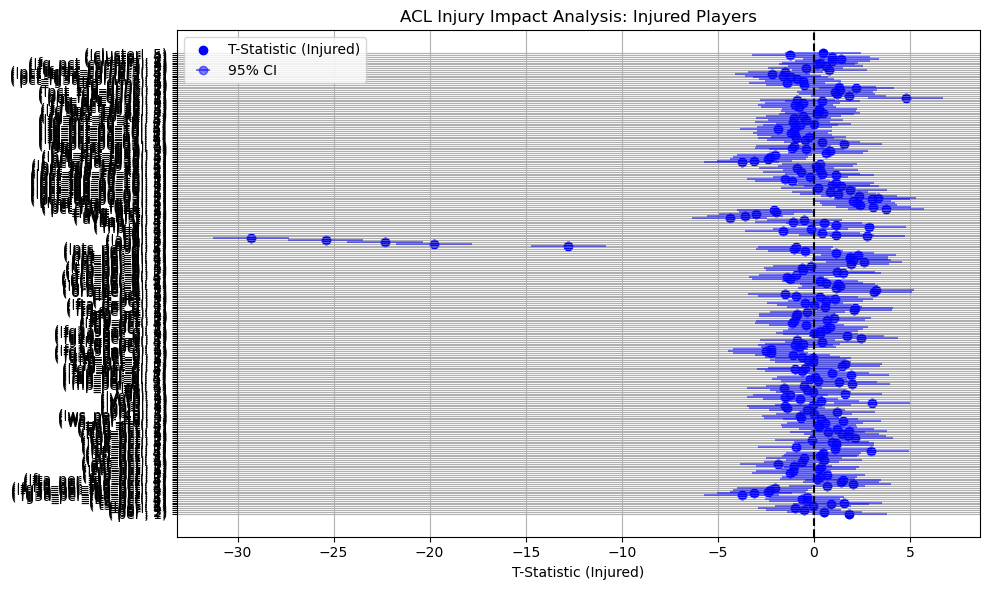


Excluded Players: set()


In [49]:
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
# Plotting forest plots
def plot_forest_plot(results_df, title):
    plt.figure(figsize=(10, 6))
    yticks = range(len(results_df))
    plt.scatter(results_df['T-Statistic (Injured)'], yticks, color='blue', label='T-Statistic (Injured)')
    plt.errorbar(results_df['T-Statistic (Injured)'], yticks, xerr=1.96, fmt='o', color='blue', alpha=0.5, label='95% CI')
    plt.yticks(yticks, results_df.index)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.xlabel('T-Statistic (Injured)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_forest_plot(results_injured_df, 'ACL Injury Impact Analysis: Injured Players')


# Identify players not included in the analysis
excluded_players = set(acl_players) - set(processed_players)
print("\nExcluded Players:", excluded_players)